In [99]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [100]:
df=yf.download('MSFT',start='2021-01-01')

[*********************100%%**********************]  1 of 1 completed


In [101]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,222.529999,223.000000,214.809998,217.690002,211.605316,37130100
2021-01-05,217.259995,218.520004,215.699997,217.899994,211.809402,23823000
2021-01-06,212.169998,216.490005,211.940002,212.250000,206.317383,35930700
2021-01-07,214.039993,219.339996,213.710007,218.289993,212.188538,27694500
2021-01-08,218.679993,220.580002,217.029999,219.619995,213.481354,22956200
...,...,...,...,...,...,...
2024-05-06,408.760010,413.929993,406.369995,413.540009,413.540009,16996600
2024-05-07,414.660004,414.670013,409.089996,409.339996,409.339996,20018200
2024-05-08,408.170013,412.230011,406.709991,410.540009,410.540009,11792300


In [102]:
df['SMA']=df.Close.rolling(window=20).mean()

In [103]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA
Date,,,,,,,
2021-01-04,222.529999,223.000000,214.809998,217.690002,211.605316,37130100,NaN
2021-01-05,217.259995,218.520004,215.699997,217.899994,211.809402,23823000,NaN
2021-01-06,212.169998,216.490005,211.940002,212.250000,206.317383,35930700,NaN
2021-01-07,214.039993,219.339996,213.710007,218.289993,212.188538,27694500,NaN
2021-01-08,218.679993,220.580002,217.029999,219.619995,213.481354,22956200,NaN
...,...,...,...,...,...,...,...
2024-05-06,408.760010,413.929993,406.369995,413.540009,413.540009,16996600,408.516499
2024-05-07,414.660004,414.670013,409.089996,409.339996,409.339996,20018200,407.669499
2024-05-08,408.170013,412.230011,406.709991,410.540009,410.540009,11792300,407.033499


In [104]:
df['stddev']=df.Close.rolling(window=20).std()

In [105]:
df['Upper']=df.SMA + 2*df.stddev
df['Lower']=df.SMA - 2*df.stddev

In [106]:
df['Buy_Signal']=np.where(df.Lower > df.Close,True,False)


In [107]:
df['Sell_Signal']=np.where(df.Upper < df.Close,True,False)

In [108]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA,stddev,Upper,Lower,Buy_Signal,Sell_Signal
Date,,,,,,,,,,,,
2021-01-04,222.529999,223.000000,214.809998,217.690002,211.605316,37130100,NaN,NaN,NaN,NaN,False,False
2021-01-05,217.259995,218.520004,215.699997,217.899994,211.809402,23823000,NaN,NaN,NaN,NaN,False,False
2021-01-06,212.169998,216.490005,211.940002,212.250000,206.317383,35930700,NaN,NaN,NaN,NaN,False,False
2021-01-07,214.039993,219.339996,213.710007,218.289993,212.188538,27694500,NaN,NaN,NaN,NaN,False,False
2021-01-08,218.679993,220.580002,217.029999,219.619995,213.481354,22956200,NaN,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-06,408.760010,413.929993,406.369995,413.540009,413.540009,16996600,408.516499,10.653901,429.824302,387.208696,False,False
2024-05-07,414.660004,414.670013,409.089996,409.339996,409.339996,20018200,407.669499,9.807073,427.283644,388.055354,False,False
2024-05-08,408.170013,412.230011,406.709991,410.540009,410.540009,11792300,407.033499,9.132016,425.297531,388.769467,False,False


In [109]:
df=df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,SMA,stddev,Upper,Lower,Buy_Signal,Sell_Signal
Date,,,,,,,,,,,,
2021-02-01,235.059998,242.500000,232.429993,239.649994,232.951508,33314200,222.858998,8.723604,240.306207,205.411789,False,False
2021-02-02,241.300003,242.309998,238.690002,239.509995,232.815414,25916300,223.949998,9.382671,242.715339,205.184656,False,False
2021-02-03,239.570007,245.089996,239.259995,243.000000,236.207855,27158100,225.204998,10.175966,245.556929,204.853067,False,False
2021-02-04,242.660004,243.240005,240.369995,242.009995,235.245514,25296100,226.692998,10.356153,247.405304,205.980691,False,False
2021-02-05,242.229996,243.279999,240.419998,242.199997,235.430237,18054800,227.888498,10.709122,249.306741,206.470255,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-06,408.760010,413.929993,406.369995,413.540009,413.540009,16996600,408.516499,10.653901,429.824302,387.208696,False,False
2024-05-07,414.660004,414.670013,409.089996,409.339996,409.339996,20018200,407.669499,9.807073,427.283644,388.055354,False,False
2024-05-08,408.170013,412.230011,406.709991,410.540009,410.540009,11792300,407.033499,9.132016,425.297531,388.769467,False,False


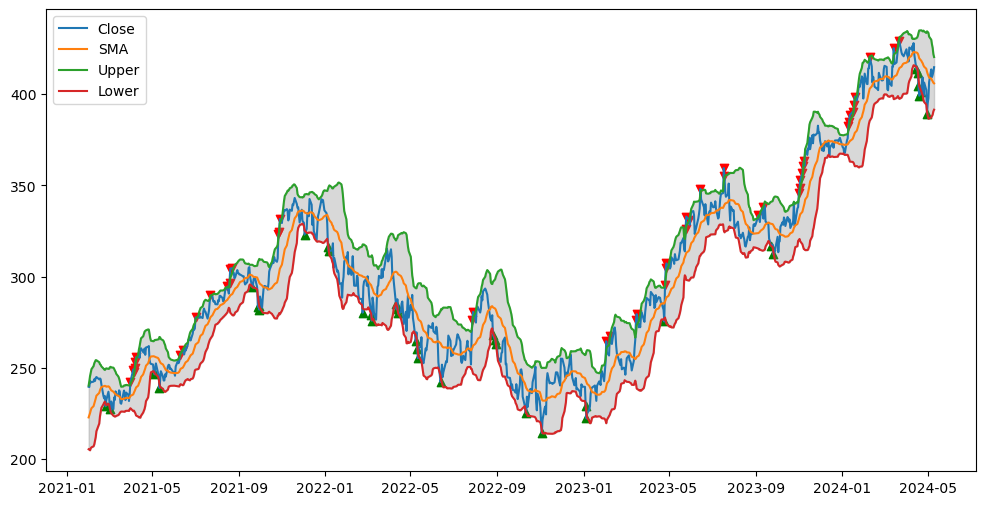

In [110]:
plt.figure(figsize=(12,6))
plt.plot(df[['Close','SMA','Upper','Lower']])
plt.scatter(df.index[df.Buy_Signal],df[df.Buy_Signal].Close,marker='^',color='g')
plt.scatter(df.index[df.Sell_Signal],df[df.Sell_Signal].Close,marker='v',color='r')
plt.fill_between(df.index,df.Upper,df.Lower,color='grey',alpha=0.3)
plt.legend(['Close','SMA','Upper','Lower'])
plt.show()

### Due to multiple trading signals , we need to remove consecutive BUy and Sell signals

In [111]:
# buys=[]
# sells=[]
# open_pos=False

# for i in range(len(df)):
#     if df.Lower[i]>df.Close[i]:
#         if open_pos==False:
#             buys.append(i)
#             open_pos =True
#         elif df.Upper[i] < df.Close[i]:
#             if open_pos:
#                 sells.append(i)
#                 open_pos=False
                
# the above is used in video and below one is given by GPT


buys = []
sells = []
open_pos = False

# Assuming you have already calculated the middle band and the standard deviation
# For example:
# middle_band = df['Close'].rolling(window=20).mean()
# std_dev = df['Close'].rolling(window=20).std()
# https://www.youtube.com/watch?v=8PzQSgw0SpM&list=PL9ATnizYJ7f9pCPBzr-isv0_R3E6OW6YY&index=33

for i in range(len(df)):
    if df['Lower'][i] > df['Close'][i] and not open_pos:
        buys.append(i)
        open_pos = True
    elif df['Upper'][i] < df['Close'][i] and open_pos:
        sells.append(i)
        open_pos = False

# Display buy and sell signals
print("Buy signals:", buys)
print("Sell signals:", sells)

Buy signals: [17, 64, 160, 213, 396, 561, 665, 805]
Sell signals: [42, 90, 187, 375, 505, 562, 693]


In [112]:
buys


[17, 64, 160, 213, 396, 561, 665, 805]

In [113]:
sells

[42, 90, 187, 375, 505, 562, 693]

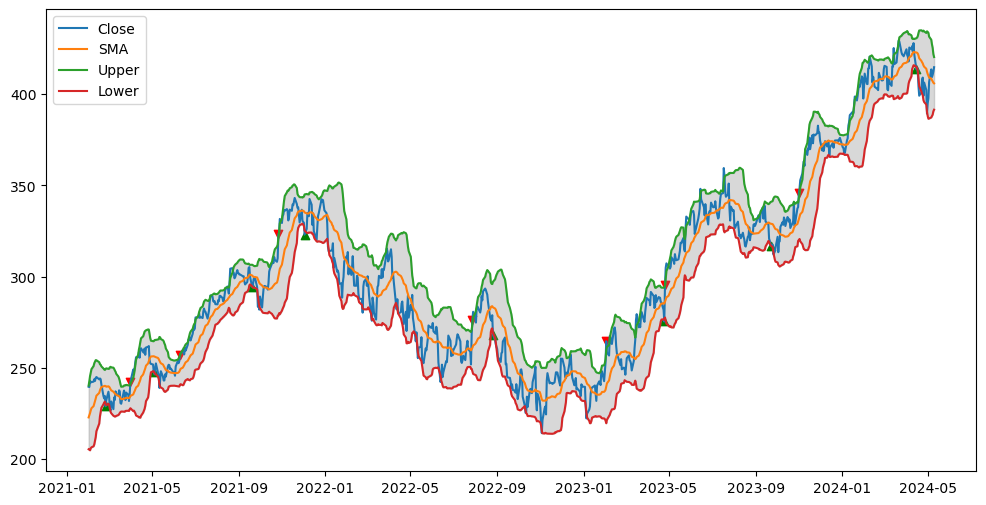

In [114]:
plt.figure(figsize=(12,6))
plt.plot(df[['Close','SMA','Upper','Lower']])
plt.scatter(df.iloc[buys].index,df.iloc[buys].Close,marker='^',color='g')
plt.scatter(df.iloc[sells].index,df.iloc[sells].Close,marker='v',color='r')
plt.fill_between(df.index,df.Upper,df.Lower,color='grey',alpha=0.3)
plt.legend(['Close','SMA','Upper','Lower'])
plt.show()

In [115]:
merged=pd.concat([df.iloc[buys].Close,df.iloc[sells].Close],axis=1)

In [116]:
merged

,Close,Close
Date,,
2021-02-25,228.990005,NaN
2021-04-01,NaN,242.350006
2021-05-04,247.789993,NaN
2021-06-10,NaN,257.239990
2021-09-20,294.299988,NaN
2021-10-27,NaN,323.170013
2021-12-03,323.010010,NaN
2022-07-28,NaN,276.410004
2022-08-26,268.089996,NaN


In [117]:
merged.columns=['Buys','Sells']
merged

,Buys,Sells
Date,,
2021-02-25,228.990005,NaN
2021-04-01,NaN,242.350006
2021-05-04,247.789993,NaN
2021-06-10,NaN,257.239990
2021-09-20,294.299988,NaN
2021-10-27,NaN,323.170013
2021-12-03,323.010010,NaN
2022-07-28,NaN,276.410004
2022-08-26,268.089996,NaN


In [118]:
totalprofit=merged.shift(-1).Sells-merged.Buys


In [119]:
rel_profit=(merged.shift(-1).Sells-merged.Buys)/merged.Buys

In [120]:
rel_profit.mean(
)

0.02877076529928087